In [66]:
#This notebook is being used to analyze diverse virus families as compared to coronaviruses

##Import the needed libraries
from Bio import SeqIO

import pandas as pd

import numpy as np

import time

from dtaidistance import dtw

from scipy.cluster.hierarchy import average, dendrogram, linkage

import time

from dtaidistance.subsequence.dtw import subsequence_alignment

from dtaidistance import dtw_visualisation as dtwvis

from math import floor, ceil

##This block of code is where the user inputs the working directory and the input file
workingDir="C:/Users/jamie/OneDrive/Documents/Biology Projects/Diverse Virus Match to Coronaviruses/Toroviruses (Tobanaviridae)/"
workingFile="Renamed_Torovirus_Spikes_FromUniProtNoDupsShortSeqsRemoved.fasta"

##Import the records from a fasta file
records = list(SeqIO.parse(workingDir+workingFile, "fasta"))
##

##Create a Pandas dataframe that can be called by residue, to hold the NoteValue array
BaseArray=pd.DataFrame.from_dict({
    'NoteValue': [0.3064,15.6497,60.7668,52.1362,76.6645,97.0000,-15.8315,-6.8806,5.5470,-2.3381,-23.9905,40.4569,60.1592,27.1418,42.9375,-22.8297,-11.7423,-17.1576,-33.9918,7.0585]},
orient='index', columns=['G','A','L','M','F','W','K','Q','E','S','P','V','I','C','Y','H','R','N','D','T'])
##

C:\Users\jamie\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:446: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')


This code took  286.6378  seconds to execute.


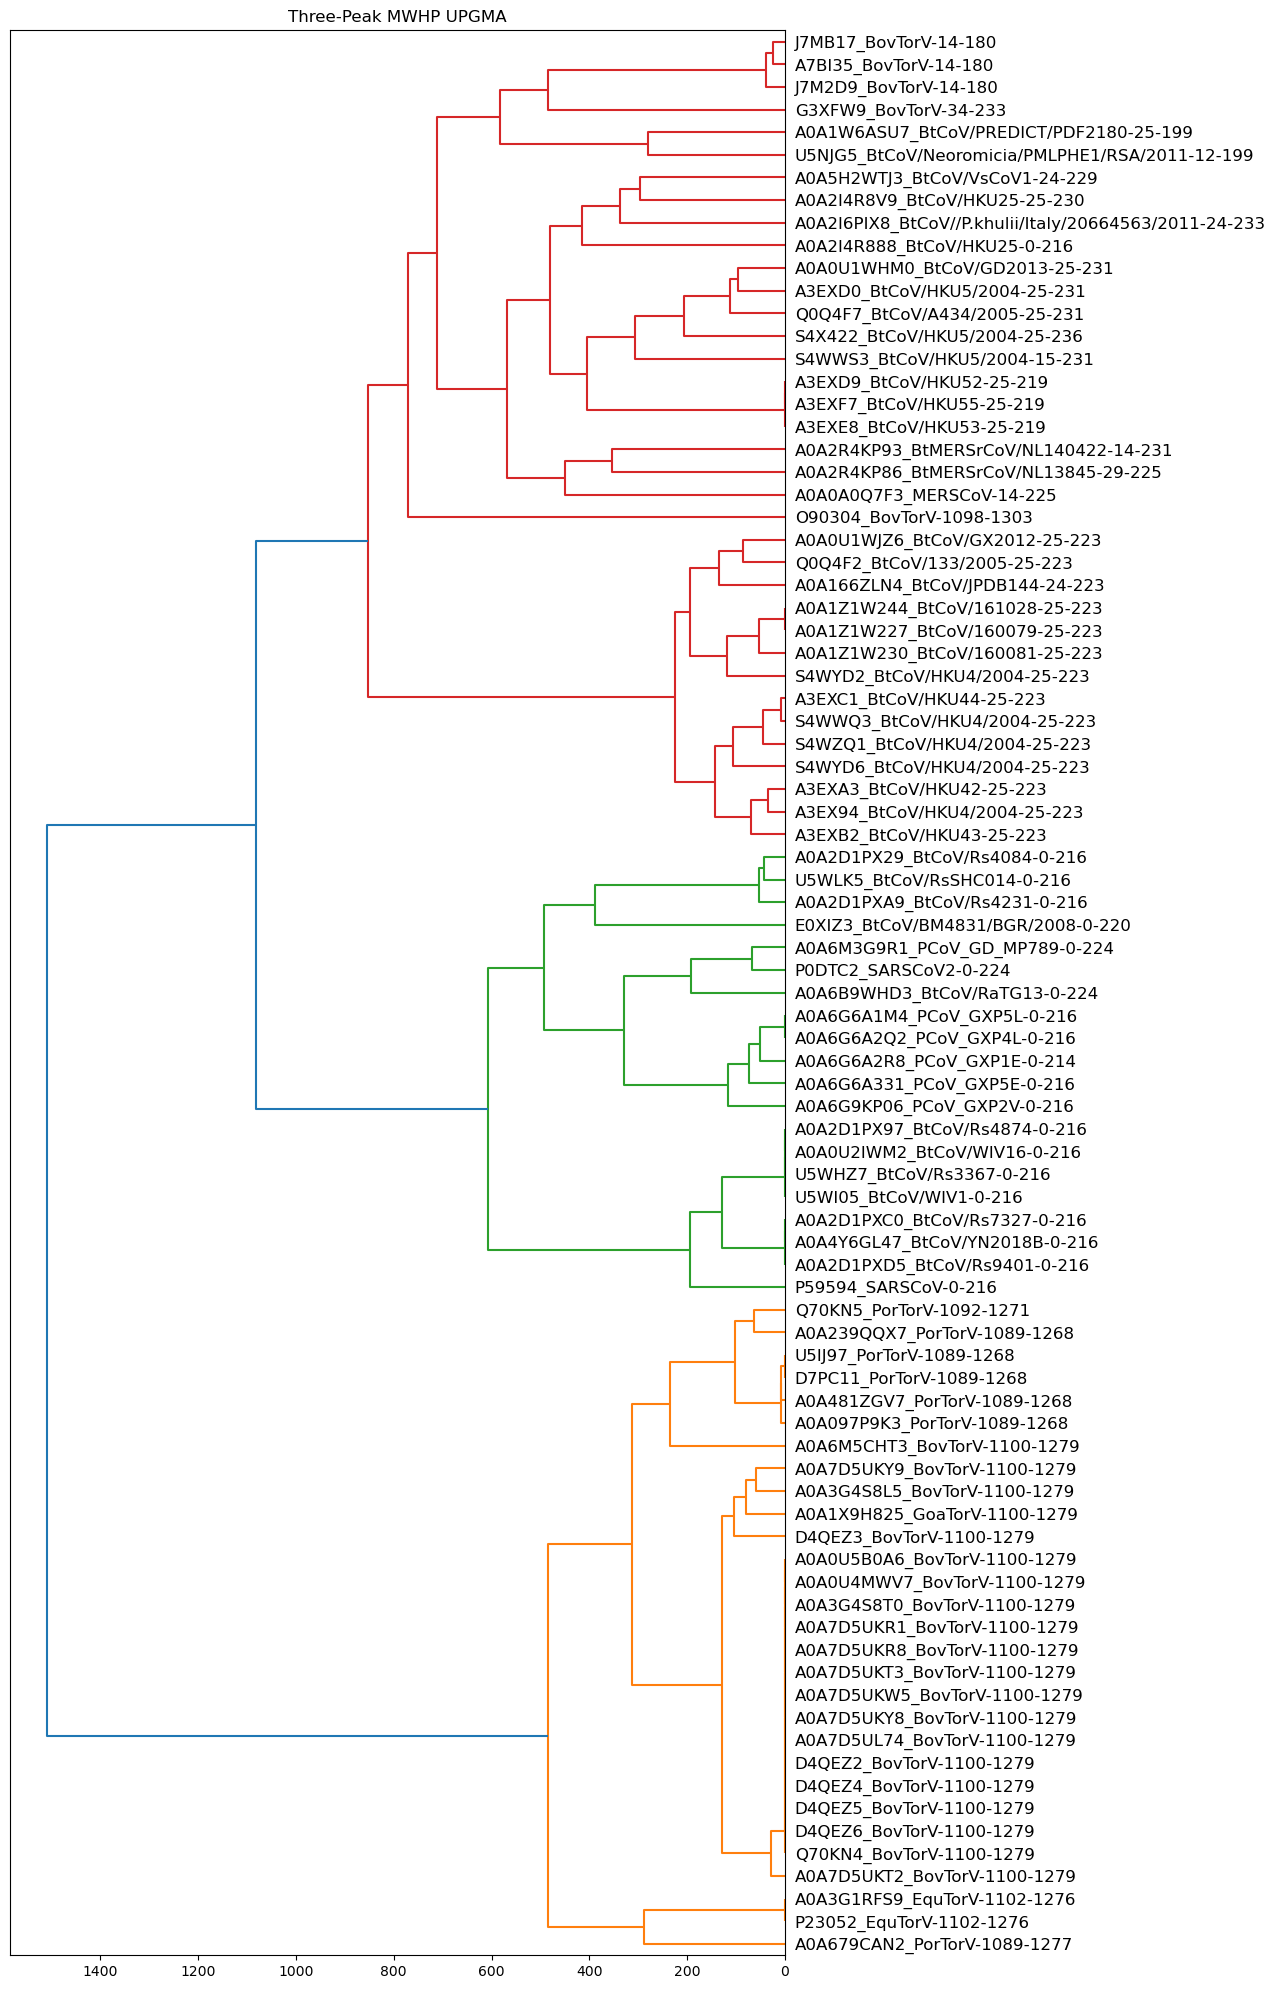

In [67]:
#Set the start time
StartTime=time.time()

#Create an empty list to hold the vectors produced from each run of the loop
tempnamesLST=[]
temptpLST=[]
tempspLST=[]

##This initializes an empty dataframe to later hold the converted sequences as vectors.  It creates single peak vectors
##and threepeak vectors but the script only uses the three peak vectors at this time.
VectorsDF=pd.DataFrame(columns=['SeqName', 'ThreePeakVector','SinglePeakVector'])
VectorsDF2=pd.DataFrame(columns=['SeqName', 'ThreePeakVector','SinglePeakVector'])
##


#Loop through all of the protein records in the fasta file converting them to vectors based on molecular weight and hydrophobicity
for i in range(0,len(records)):
    
    names = records[i].description
    
    #print (names)
    
    currentseq = records[i].seq
    
    #print (records[i].seq)
    
    lengther=len(currentseq)
    
    ##
    
    ##This block of code looks for characters that are not amino acids and if any are found replaces them with a 'G'

    #Convert all of the charaters to upper before converting it to a list
    currentseq=currentseq.upper()

    #Convert the current sequence to a list (JD)
    currentseq=list(currentseq)

    #Loop through all of the characters and if any are not allowed amino acids, replace them with a 'G'
    for j in range(lengther):
            strAllowedChars = ["A", "C", "D", "E", "F", "G", "H", "I", "K", "L","M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y"]

            if currentseq[j] not in strAllowedChars: 
                currentseq[j] = currentseq[j].replace(currentseq[j],'G')

    #Convert the list back to a string
    currentseq=''.join(currentseq)

    ##   
    
    ##This block of code creates a vector containing only the notevalues representing the amino acid sequence

    NoteVec=[]
    ender=currentseq[-1]
    currentseq="G"+currentseq+ender
    lengther=len(currentseq)

    for k in range(lengther):
        if k==lengther:
            NoteVec.append(BaseArray[currentseq[k-1]].NoteValue)
        else:
            NoteVec.append(BaseArray[currentseq[k]].NoteValue)

    ##   
    
    ##This block of code converts a vector of NoteValues to a three-peak vector

    lengther2=(len(NoteVec))-1
    ThreePeakOutVector=[]

    for l in range(lengther2):
        if l==0:
            PreOutvalue=NoteVec[l]/2
            Outvalue=((NoteVec[l]*2)+((NoteVec[l]+NoteVec[l+1])/2))/2
            PostOutvalue=(NoteVec[l]+((NoteVec[l]+NoteVec[l+1])/2))/2
            ThreePeakOutVector.append(round(PreOutvalue,4))
            ThreePeakOutVector.append(round(Outvalue,4))
            ThreePeakOutVector.append(round(PostOutvalue,4))
        elif i==lengther:
            PreOutvalue=(NoteVec[l]+((NoteVec[l]+NoteVec[l-1])/2))/2
            Outvalue=((NoteVec[l]*2)+((NoteVec[l]+NoteVec[l-1])/2))/2
            PostOutvalue=NoteVec[l]
            ThreePeakOutVector.append(round(PreOutvalue,4))
            ThreePeakOutVector.append(round(Outvalue,4))
            ThreePeakOutVector.append(round(PostOutvalue,4))
        else:
            PreOutvalue=(NoteVec[l]+((NoteVec[l]+NoteVec[l-1])/2))/2
            Outvalue=((NoteVec[l])+((NoteVec[l]+NoteVec[l+1])/2)+((NoteVec[l]+NoteVec[l-1])/2))/2  
            PostOutvalue=(NoteVec[l]+((NoteVec[l]+NoteVec[l+1])/2))/2
            ThreePeakOutVector.append(round(PreOutvalue,4))
            ThreePeakOutVector.append(round(Outvalue,4))
            ThreePeakOutVector.append(round(PostOutvalue,4))            
    ##
    
    #This extracts the single peak vector from the three peak vector
    SinglePeakOutVector=ThreePeakOutVector[1::3]
    
    #This populates the VectorsDF with the three and single peak vectors
    #The append method for dataframes is being deprecated.  It is however ~10X faster than the way I did it below.  At this moment it still works so I am keeping it here.
    # VectorsDF= VectorsDF.append({"SeqName": names, 'ThreePeakVector': np.array(ThreePeakOutVector),'SinglePeakVector': np.array(SinglePeakOutVector)}, ignore_index=True) 
    ##
    
    #Create temporary lists to hold the ThreePeakOutVector and SinglePeakOutVector
    tempnamesLST.append(names)
    temptpLST.append(np.array(ThreePeakOutVector))
    tempspLST.append(np.array(SinglePeakOutVector))  
    ##
    
##Populate the VectorsDF with the temporary lists containing the sequence names, the ThreePeakVector and the
##SinglePeakVector
VectorsDF['SeqName']=tempnamesLST
VectorsDF['ThreePeakVector']=temptpLST
VectorsDF['SinglePeakVector']=tempspLST
 
##Calculate the pairwise distance between all pairs of sequences in the input file
#Convert the vectors stored in VectorsDF to a list to use to calculate a distance matrix
ThreePeakVectorsList=VectorsDF["ThreePeakVector"].values.tolist()

#Initialize temporary lists and a dataframe to store the subsequence matches.
tempsubseqnames=[]
tempsubseqs=[]
MatchedSeqsDF=pd.DataFrame(columns=['SeqName', 'Matched_Segment'])

#Find the part of all of the sequences that match the first sequence in the fasta file best.
for m in range(len(records)):
    bestmatch = subsequence_alignment(ThreePeakVectorsList[0], ThreePeakVectorsList[m])
    match = bestmatch.best_match()
    startpoint, endpoint = match.segment
    #dtwvis.plot_warpingpaths(ThreePeakVectorsList[1], ThreePeakVectorsList[4], bestmatch.warping_paths(), match.path)
    tempsubseqnames.append(str(records[m].description)+ "-" + str(floor(startpoint/3)) + "-" + str(ceil(endpoint/3)))
    tempsubseqs.append(np.array((ThreePeakVectorsList[m])[startpoint:endpoint+1]))
                       
#Populate the MatchedSeqsDF with the subsequences that match the first sequence in the input fasta file
MatchedSeqsDF['SeqName']=tempsubseqnames
MatchedSeqsDF['Matched_Segment']=tempsubseqs

#Convert the matched segments to a list to use in DTW distance matrix creation.
SubSeqThreePeakVectorsList=MatchedSeqsDF['Matched_Segment'].values.tolist()

#Calculate the pairwise distance matrix
distanceMatrix = dtw.distance_matrix_fast(SubSeqThreePeakVectorsList,compact=False)
##
    
##The folowing block of code performs UPGMA HCA on a distance matrix, builds the resulting dendrogram and exports 
##the dendrogram as a .png

#Get the current datetime to use in file names
timestamp=str(time.time())

#Extract the names for VectorsDF so they can be used in the dendrogram
SequenceNames=MatchedSeqsDF['SeqName'].values.tolist()

#Perform UPGMA hierarchical cluster
outDND=average(distanceMatrix)

#Plot the UPGMA dendrogram
import matplotlib.pyplot as plt
f=plt.figure()
f.set_figwidth(10)
f.set_figheight(25)
plt.title("Three-Peak MWHP UPGMA")
dendro1=dendrogram(outDND,labels=SequenceNames,leaf_font_size=12,orientation='left')

##This block of code saves the dendrogram produced above as a .png file
plt.savefig(workingDir+timestamp+"DendrogramOutput.png",bbox_inches='tight')

##This block of code converts the linkage matrix outDND (a dendrogram) to newick format
##This code is set to be incorporated in scipy in the near future and was found at 
## https://github.com/scipy/scipy/issues/8274
from scipy.cluster import hierarchy
def getNewick(node, newick, parentdist, leaf_names):
    if node.is_leaf():
        return "%s:%.2f%s" % (leaf_names[node.id], parentdist - node.dist, newick)
    else:
        if len(newick) > 0:
            newick = "):%.2f%s" % (parentdist - node.dist, newick)
        else:
            newick = ");"
        newick = getNewick(node.get_left(), newick, node.dist, leaf_names)
        newick = getNewick(node.get_right(), ",%s" % (newick), node.dist, leaf_names)
        newick = "(%s" % (newick)
        return newick

tree = hierarchy.to_tree(outDND,False)
newickOutput=getNewick(tree, "", tree.dist, SequenceNames)
##

##This block of code is used to save the dendrogram created above in newick format

with open(workingDir+timestamp+'NewickOutput.nwk', 'w') as f:
    f.write(newickOutput)
##

#Set the end time
EndTime=time.time()

#Calculate the execution time of the code between StartTime and EndTime
CodeExecutionTime=EndTime-StartTime
print('This code took ',round(CodeExecutionTime,4), ' seconds to execute.' )

In [68]:
##The following block of code can be used to perform neighbor-joining of the above distance matrix##
import biotite
import biotite.sequence.phylo as phy
import numpy as np

#Convert the distance matrix above into the form needed by biotite to perform NJ clustering
distanceMatrixNJ=np.array(distanceMatrix)
distanceMatrixNJ=distanceMatrixNJ.reshape(-1,len(SequenceNames))

#Build the NJ tree from the above distance matrix
tree = phy.neighbor_joining(distanceMatrixNJ)

#Print the tree out to newick format
#print(tree.to_newick(labels=SequenceNames,include_distance=True))

newickOutputNJ=tree.to_newick(labels=SequenceNames,include_distance=True)

##This block of code is used to save the dendrogram created above in newick format
with open(workingDir+timestamp+'ToroVSpikeNJNewickOutput.nwk', 'w') as f:
    f.write(newickOutputNJ)



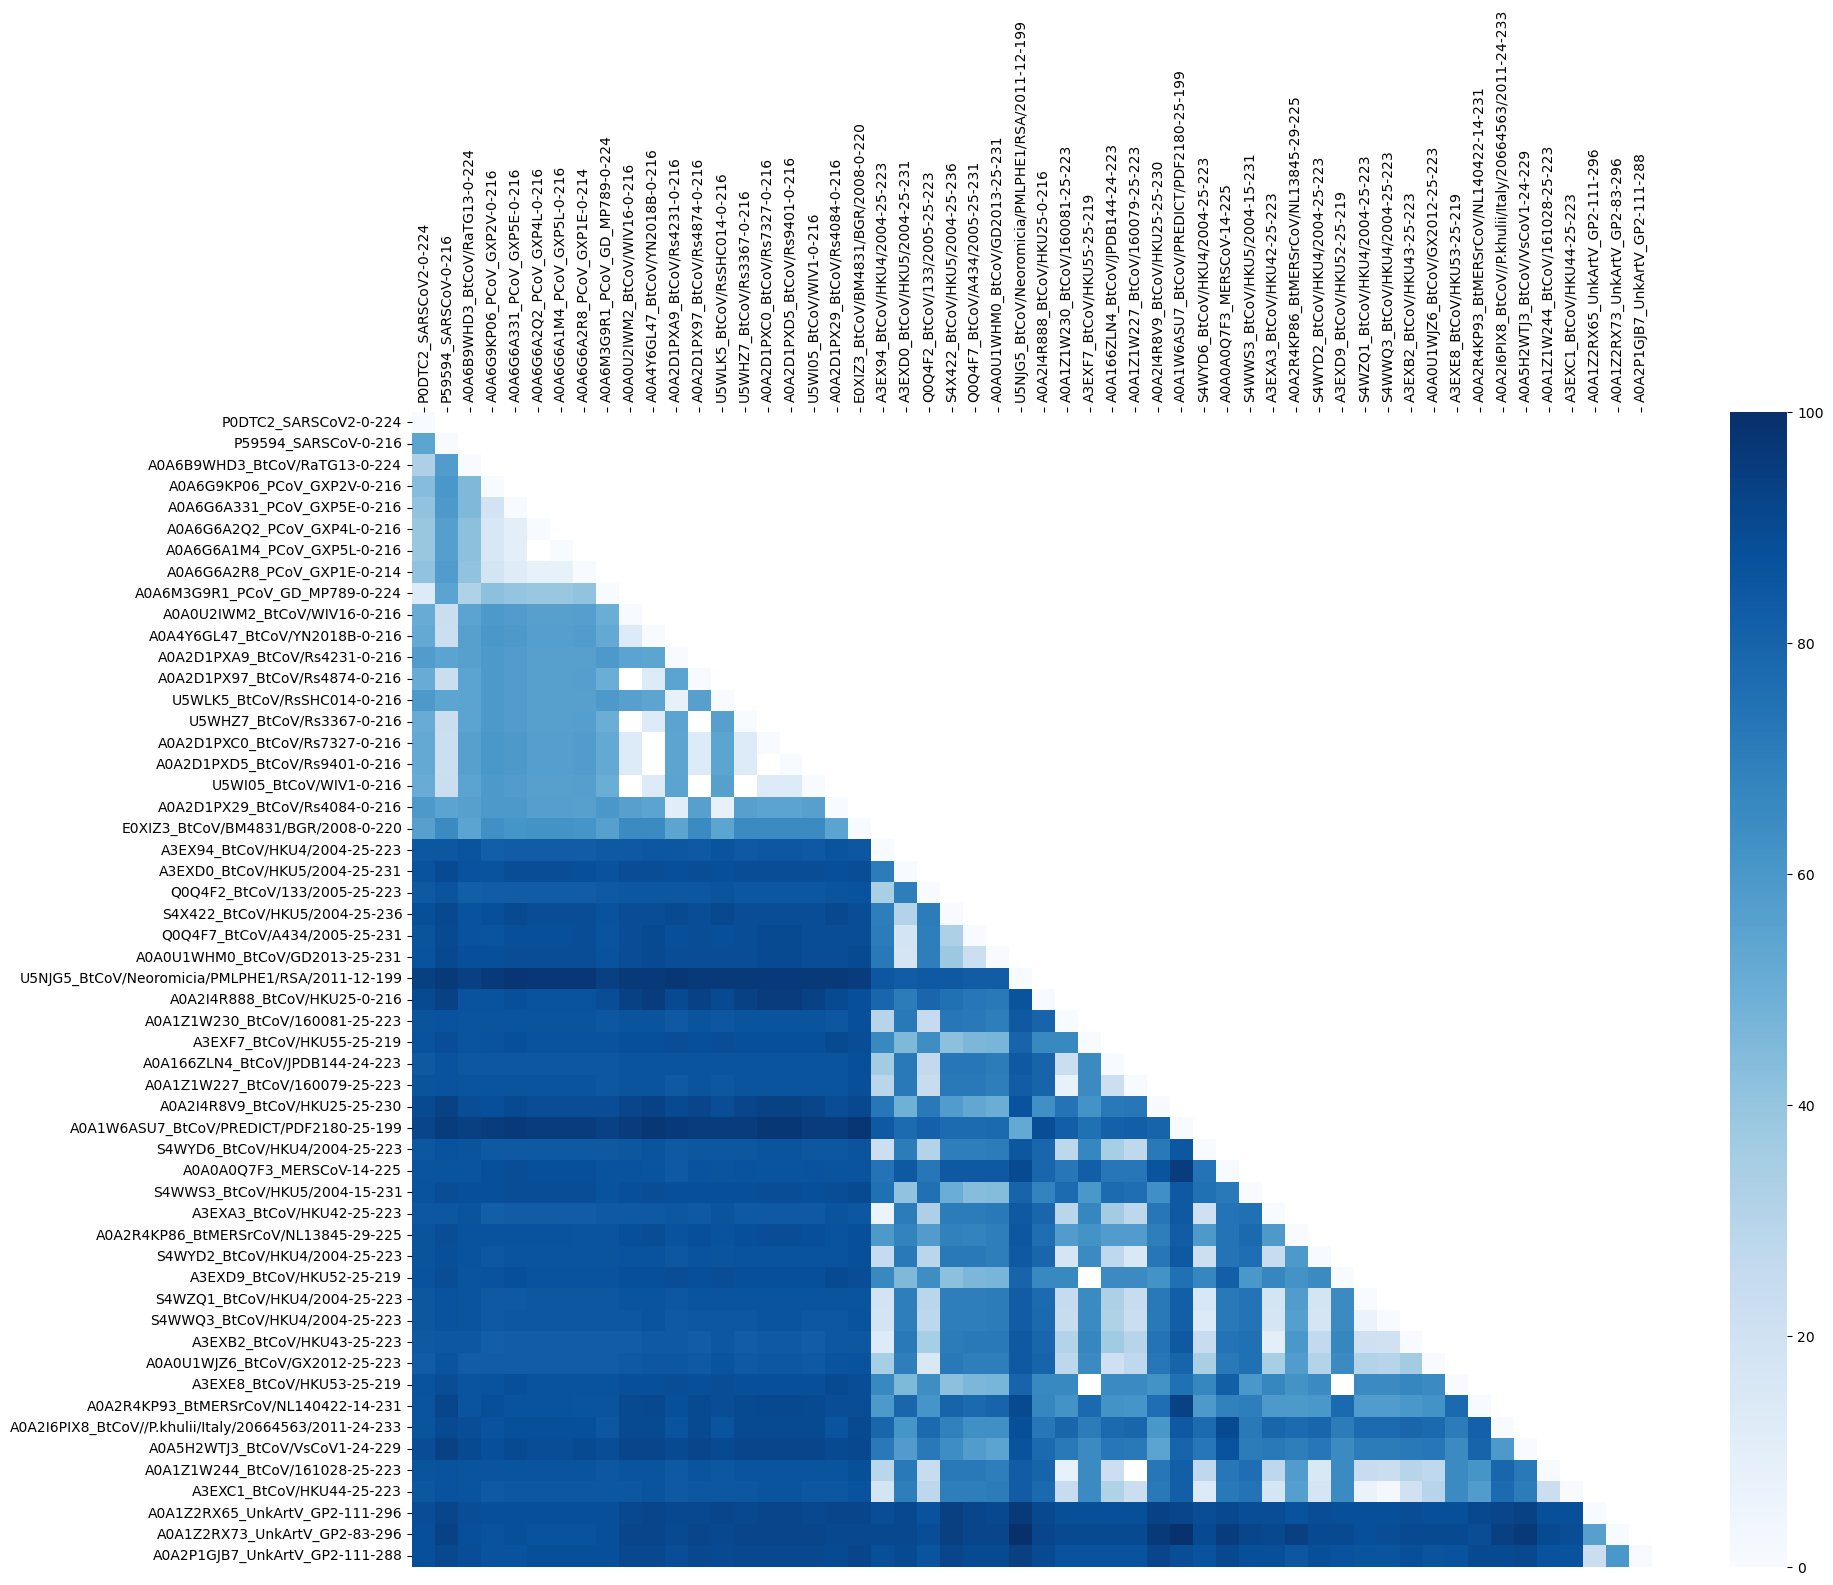

In [126]:
##Compile the distance matrix from the DTW distance values above.##

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

#Calculate the pairwise distance matrix
distanceMatrix2 = dtw.distance_matrix_fast(SubSeqThreePeakVectorsList,compact=False)

#Normalize the distance matrix and scale it to 100
distanceMatrixMax=np.max(distanceMatrix2)
distanceMatrixMin=np.min(distanceMatrix2)
distanceMatrix3=(((distanceMatrix2-distanceMatrixMin)/(distanceMatrixMax-distanceMatrixMin)).round(2))*100
distanceMatrix2=distanceMatrix3


newdistanceMatrix=np.tril((np.asarray(distanceMatrix2)),k=0)


#Set the upper triangle values to NaN
#a = np.random.random(((len(SequenceNames)), (len(SequenceNames))))
newdistanceMatrix *= np.tri(*newdistanceMatrix.shape)
newdistanceMatrix[newdistanceMatrix == 0] = "NaN"


#Get the indices for the upper triangle of the matrix
#maskedindices=np.triu_indices(len(SequenceNames, k=1)

#Set the diagonal values to show 0 distance not NaN
np.fill_diagonal(newdistanceMatrix, "0")

#Set the upper triangle values to NaN
#np.triu(newdistanceMatrix, "NaN")

xaxislabels=[]
xaxislabels=SequenceNames

yaxislabels=xaxislabels
colors=sns.color_palette("Blues", as_cmap=True)

fig, ax = plt.subplots(figsize=(20, 15))


ax = sns.heatmap(newdistanceMatrix, cmap=colors, linewidth=0.0,xticklabels=xaxislabels, yticklabels=yaxislabels, 
                 annot=False, annot_kws={'size': 8},fmt='g')
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.xticks(rotation=90)
#This will allow you to save the plot above
plt.savefig("C:/Users/jamie/OneDrive/Documents/Biology Projects/Diverse Virus Match to Coronaviruses/PairwiseAlignments/ArterivirusDTWMatrix.png", dpi=300, bbox_inches = 'tight')
plt.show()